<a href="https://colab.research.google.com/github/AnikaZN/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Anika_Nacey_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

#add informative names and also fix the shape of the data/first row
column_heads = ['age', 'operation_year', 'positive_nodes', 'survival_5_years']

cancer = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None, names=column_heads)
cancer.head()

,age,operation_year,positive_nodes,survival_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
cancer.shape

(306, 4)

In [0]:
cancer.isna().sum()

#source says that there are no missing values

age                 0
operation_year      0
positive_nodes      0
survival_5_years    0
dtype: int64

In [0]:
#just in case

cancer.sample(10)

#ran this a couple times and didn't find any question marks or other placeholders

,age,operation_year,positive_nodes,survival_5_years
67,43,64,2,1
165,53,61,1,1
216,59,60,0,1
22,37,60,15,1
303,77,65,3,1
122,49,61,0,1
289,70,68,0,1
68,43,64,3,1
148,52,69,0,1
47,41,59,8,1


In [0]:
cancer.survival_5_years = cancer.survival_5_years.replace(2, 0)
cancer.head(10)

#the ones don't need to be changed

,age,operation_year,positive_nodes,survival_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [0]:
cancer.head()

,age,operation_year,positive_nodes,survival_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
cancer.describe()

,age,operation_year,positive_nodes,survival_5_years
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


The things that stands out most to me in this data is the positive_nodes column, which has some very significant outliers - the mean is 3.0 away from the median, which is abnormal, and this is a very high standard deviation, especially when you consider the fact that there is almost no data on the low end of this data, it is all on the high end.

The age data is almost shockingly normal, but that's nothing to call home about.

In [0]:
nodes_bin = pd.cut(cancer['positive_nodes'], 10)

pd.crosstab(nodes_bin, [cancer['survival_5_years']], normalize='index')

survival_5_years,0,1
positive_nodes,,
"(-0.052, 5.2]",0.194915,0.805085
"(5.2, 10.4]",0.400000,0.600000
"(10.4, 15.6]",0.611111,0.388889
"(15.6, 20.8]",0.500000,0.500000
"(20.8, 26.0]",0.666667,0.333333
"(26.0, 31.2]",0.000000,1.000000
"(31.2, 36.4]",1.000000,0.000000
"(41.6, 46.8]",0.000000,1.000000
"(46.8, 52.0]",1.000000,0.000000


It's pretty apparent from this data that the number of nodes has an impact on survivability, but there is one abnormality I noticed - it could be due to a lack of data, but the fact that the odds of survival are actually greater for patients with 15.6-20.8 nodes than they are for those with 1.4-15.6 nodes is highly irregular.

In [0]:
import seaborn as sns

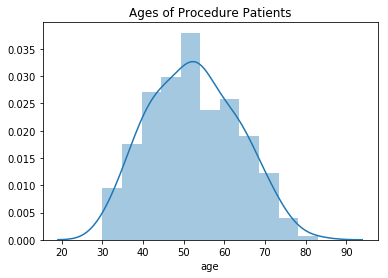

In [0]:
sns.distplot(cancer['age']).set_title('Ages of Procedure Patients');

Nothing horribly shocking or unusual here.

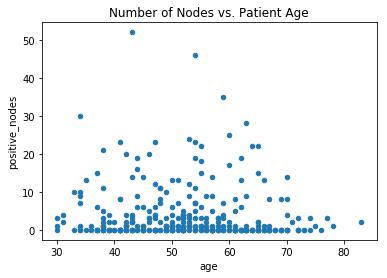

In [0]:
cancer.plot.scatter(x = 'age', y = 'positive_nodes', title='Number of Nodes vs. Patient Age');

Limited info can be gathered from this one, considering the fact that its shape is so similar to the above graph (did age actually impact the number of nodes or do we just have more data for age groups that have the procedure done more frequently?)

A quick check of the math confirms that, even if the data is flawed, there isn't any significant correlation, anyway:

In [0]:
import numpy as np

x = cancer.age
y = cancer.positive_nodes

np.corrcoef(x,y)
print('Almost no correlation: -0.0632')

Almost no correlation: -0.0632


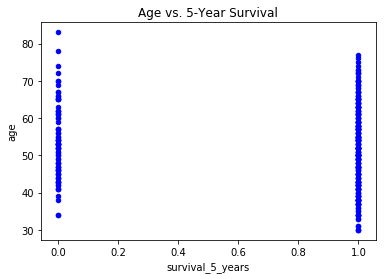

In [0]:
cancer.plot.scatter(x = 'survival_5_years', y = 'age', c='b', title='Age vs. 5-Year Survival');

Hard to read because of the binary nature of surviving, but this definitely demonstrates a correlation between and surviving the procedure - no one under ~34 died, and 2/3 of the patients from 75-80 died

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

The number of nodes seems to have the most obvious negative relationship with survival - as the number of nodes increase, so do the odds of survival - this is seen most easily in the crosstab, which was the second plot coded in this assignment.

Similarly, it seems apparent that a patient's age has a negative relationship with surviving - younger patients lived more predictably, just the same as older patients died more predictably. It should be noted, though, that this was most visible in the far ends of the ages represented.

Despite these relationships, the correlation between number of nodes and the age of patients is almost nonexistent.

There are no data represented here which have any significant positive correlations to the survival of patients.